In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import glob, os
import datetime
import json

import pickle

pd.set_option('display.max_columns', None)  
# pd.set_option('display.max_colwidth', 125)  # or 199

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate


from sklearn.preprocessing import StandardScaler

First step - load in the games df, and the game text df. Merge them on index / id, and then select my features

In [4]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/games_and_lsatopics.pickle', 'rb') as f:
    df_games_text = pickle.load(f)

In [12]:
df_games_text.tail()

,index,final_state,id,name,blurb,category_name,blurb_processed,blurb_processed_2,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
5897,96009,failed,2134197809,Erste Trampolinhalle für Thüringens Landeshaup...,Trampolinhalle für Thüringens Landeshauptstadt...,Live Games,trampolinhalle für thüringens landeshauptstadt...,trampolinhalle für thüringen landeshauptstadt ...,0.002471,-0.001968,-0.000259,0.000860,0.002196,0.003861,0.000252,0.000144,-0.001439,-0.000366,-0.003278,-0.003416,0.000866,0.002933,-0.000647,0.002098,-0.001116,0.002091,-0.001065,-0.001051
5898,96010,failed,980434532,Raise Your Army - MMO/STRATEGY/SHOOOTING/AWESOME,"A MMO game made for everyone, by utilizing RTS...",Live Games,a mmo game made for everyone by utilizing rts ...,a mmo game make for everyone by utilize rt h h...,0.065023,-0.024298,0.020028,0.009022,0.052116,0.029865,-0.002962,-0.012319,0.014372,-0.002352,0.014600,0.008633,0.049915,0.004920,-0.024458,-0.048277,0.009733,-0.026454,0.013366,0.011312
5899,96011,failed,2049587097,Virtual Reality First Person Shooter/Fight-arena,FIRST EVER: Live First Person Shooter/Fighter-...,Live Games,first ever live first person shooter fighter s...,first ever live first person shooter fighter s...,0.011739,-0.009346,-0.007627,0.025622,0.004316,-0.004010,-0.013538,-0.009521,-0.010153,0.020467,-0.001269,0.003134,-0.005629,0.005631,-0.011344,0.008412,-0.002873,0.016103,0.013294,-0.001485
5900,96012,failed,795383476,ProTr4der - augmented reality education game,"ProTr4der is a real life like education game, ...",Live Games,protr der is a real life like education game p...,protr der be a real life like education game p...,0.076644,-0.041881,0.026237,0.063194,-0.013398,-0.016339,-0.057097,0.060388,-0.001006,0.033269,-0.063835,-0.079833,-0.004063,0.014395,-0.017932,0.007795,0.085292,-0.023997,-0.043843,-0.024085
5901,96013,failed,1683692425,Gaming World,I want to start a world that all gamers from a...,Live Games,i want to start a world that all gamers from a...,i want to start a world that all gamer from al...,0.033154,-0.023441,-0.032490,0.015081,0.005343,-0.022521,-0.015266,-0.001241,-0.023950,-0.030505,-0.026634,-0.041224,-0.003144,0.027015,0.028225,-0.023482,0.021750,-0.001868,-0.019434,-0.023051


In [7]:
df_games_text.shape

(5902, 28)

In [8]:
with open('/Users/robertpagano/metis_data/project_4/model_data/df_games_2016_2019.pickle', 'rb') as f:
    df_games_orig = pickle.load(f)

In [11]:
df_games_orig.tail()

,backers_count,blurb,converted_pledged_amount,country,goal,id,name,pledged,slug,staff_pick,state,state_changed_at,static_usd_rate,usd_pledged,date_created,deadline_date,launched_date,date_state_changed,time_to_launch,day_limit,current_date,days_left,days_in_field,manual_usd_rate,converted_goal,category_id,category_name,category_position,category_slug,creator_id,profile_id,profile_project_id,urls_project,category_main,remaining_money_needed,money_needed_by_day,money_gained_per_day,current_by_remaining_rate,final_state
96009,17,Trampolinhalle für Thüringens Landeshauptstadt...,NaN,DE,60000.0,2134197809,Erste Trampolinhalle für Thüringens Landeshaup...,525.0,erste-trampolinhalle-fur-thuringens-landeshaup...,False,live,1449658781,1.085329,569.797478,2015-12-06 09:25:36,2016-02-07 10:59:41,2015-12-09 10:59:41,2015-12-09 10:59:41,3,60,2016-01-28,10,50,NaN,65120,271,Live Games,2,games/live games,NaN,2264057,2264057,NaN,games,64550.202522,6455.020252,11.395950,0.001765,failed
96010,2,"A MMO game made for everyone, by utilizing RTS...",NaN,US,80000.0,980434532,Raise Your Army - MMO/STRATEGY/SHOOOTING/AWESOME,50.0,raise-your-army-mmo-strategy-shoooting-awesome,False,live,1450231236,1.000000,50.000000,2015-03-01 04:19:04,2016-02-04 02:00:36,2015-12-16 02:00:36,2015-12-16 02:00:36,289,50,2016-01-28,7,43,NaN,80000,271,Live Games,2,games/live games,NaN,1739889,1739889,NaN,games,79950.000000,11421.428571,1.162791,0.000102,failed
96011,0,FIRST EVER: Live First Person Shooter/Fighter-...,NaN,DK,1000000.0,2049587097,Virtual Reality First Person Shooter/Fight-arena,0.0,virtual-reality-first-person-shooter-fight-arena,False,live,1452098180,0.145102,0.000000,2016-01-03 17:30:10,2016-03-06 16:36:20,2016-01-06 16:36:20,2016-01-06 16:36:20,2,60,2016-01-28,38,22,NaN,145102,271,Live Games,2,games/live games,NaN,2302990,2302990,NaN,games,145102.000000,3818.473684,0.000000,0.000000,failed
96012,1,"ProTr4der is a real life like education game, ...",NaN,FR,575000.0,795383476,ProTr4der - augmented reality education game,50.0,protr4der-augmented-reality-education-game,False,live,1449579474,1.086015,54.300726,2015-11-17 09:05:53,2016-01-31 22:59:00,2015-12-08 12:57:54,2015-12-08 12:57:54,21,54,2016-01-28,3,51,NaN,624458,271,Live Games,2,games/live games,NaN,2233200,2233200,NaN,games,624403.699274,208134.566425,1.064720,0.000005,failed
96013,0,I want to start a world that all gamers from a...,NaN,US,25000.0,1683692425,Gaming World,0.0,gaming-world,False,live,1452365133,1.000000,0.000000,2016-01-08 16:35:31,2016-03-09 18:45:33,2016-01-09 18:45:33,2016-01-09 18:45:33,1,60,2016-01-28,41,19,NaN,25000,271,Live Games,2,games/live games,NaN,2311728,2311728,NaN,games,25000.000000,609.756098,0.000000,0.000000,failed


In [10]:
df_games_orig.shape

(5902, 39)

In [13]:
df_games_orig = df_games_orig.reset_index()

In [14]:
df_games_orig.head()

,index,backers_count,blurb,converted_pledged_amount,country,goal,id,name,pledged,slug,staff_pick,state,state_changed_at,static_usd_rate,usd_pledged,date_created,deadline_date,launched_date,date_state_changed,time_to_launch,day_limit,current_date,days_left,days_in_field,manual_usd_rate,converted_goal,category_id,category_name,category_position,category_slug,creator_id,profile_id,profile_project_id,urls_project,category_main,remaining_money_needed,money_needed_by_day,money_gained_per_day,current_by_remaining_rate,final_state
0,1796,107,An artistic professional pack of playing cards...,5125.0,CA,8000.0,269726791,Emanations Playing Cards | A Study of Real Magic,6770.29,emanations-playing-cards-a-study-of-real-magic,False,live,1549665049,0.755093,5112.199264,2019-01-12 02:34:21,2019-03-01 04:55:00,2019-02-08 22:30:48,2019-02-08 22:30:49,27,20,2019-02-14,15,6,0.757016,6041,273,Playing Cards,4,games/playing cards,1.972596e+09,3551993,3551993,https://www.kickstarter.com/projects/mahdigilb...,games,916.0,61.066667,854.166667,13.987445,successful
1,2575,171,Make it rain pancakes in FAT STACKS. \nCreate ...,6587.0,US,10000.0,1697621882,FAT STACKS: The Pancake Stacking Strategy Card...,6587.00,fat-stacks,False,live,1546614890,1.000000,6587.000000,2018-12-22 23:03:04,2019-02-03 15:14:49,2019-01-04 15:14:49,2019-01-04 15:14:50,12,30,2019-01-17,17,13,1.000000,10000,34,Tabletop Games,6,games/tabletop games,1.790178e+08,3540073,3540073,https://www.kickstarter.com/projects/candycode...,games,3413.0,200.764706,506.692308,2.523812,successful
2,2594,133,"Endless playability, stunning artwork and fant...",4856.0,US,10000.0,2046938895,Royal Heroz - Fantasy Strategy Playing Cards,4856.00,royal-heroz-fantasy-strategy-playing-cards,False,live,1543496274,1.000000,4856.000000,2018-11-06 04:12:47,2019-01-28 12:57:53,2018-11-29 12:57:53,2018-11-29 12:57:54,23,60,2019-01-17,11,49,1.000000,10000,273,Playing Cards,4,games/playing cards,1.539175e+09,3508195,3508195,https://www.kickstarter.com/projects/153917502...,games,5144.0,467.636364,99.102041,0.211921,successful
3,2665,187,"In 'Coral', use dice to make shapes in 3D! In ...",7420.0,GB,6500.0,1642293087,Coral Islands : 2 interactive dice-stacking ga...,5772.00,coral-islands-2-interactive-dice-stacking-game...,False,live,1547640130,1.289925,7445.445830,2018-11-21 13:04:17,2019-02-05 22:30:00,2019-01-16 12:02:09,2019-01-16 12:02:10,55,20,2019-01-17,19,1,1.285516,8385,34,Tabletop Games,6,games/tabletop games,1.529264e+09,3519666,3519666,https://www.kickstarter.com/projects/alleycatg...,games,965.0,50.789474,7420.000000,146.093264,successful
4,2668,6,Online 3D Stores for businesses that blur 3D G...,91.0,US,50000.0,932587626,3D Shopping with WalkTheWeb 3D Technology!,91.00,3d-shopping-with-walktheweb-franchising-3d-web...,False,live,1544716132,1.000000,91.000000,2018-11-29 16:30:36,2019-02-11 15:48:51,2018-12-13 15:48:51,2018-12-13 15:48:52,13,60,2019-01-17,25,35,1.000000,50000,271,Live Games,2,games/live games,7.987651e+08,3525453,3525453,https://www.kickstarter.com/projects/walkthewe...,games,49909.0,1996.360000,2.600000,0.001302,failed


In [15]:
df_games_X = pd.merge(df_games_orig, df_games_text, left_index=True, right_index=True)

In [16]:
df_games_X.shape

(5902, 68)

In [17]:
df_games_X.head()

,index_x,backers_count,blurb_x,converted_pledged_amount,country,goal,id_x,name_x,pledged,slug,staff_pick,state,state_changed_at,static_usd_rate,usd_pledged,date_created,deadline_date,launched_date,date_state_changed,time_to_launch,day_limit,current_date,days_left,days_in_field,manual_usd_rate,converted_goal,category_id,category_name_x,category_position,category_slug,creator_id,profile_id,profile_project_id,urls_project,category_main,remaining_money_needed,money_needed_by_day,money_gained_per_day,current_by_remaining_rate,final_state_x,index_y,final_state_y,id_y,name_y,blurb_y,category_name_y,blurb_processed,blurb_processed_2,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,1796,107,An artistic professional pack of playing cards...,5125.0,CA,8000.0,269726791,Emanations Playing Cards | A Study of Real Magic,6770.29,emanations-playing-cards-a-study-of-real-magic,False,live,1549665049,0.755093,5112.199264,2019-01-12 02:34:21,2019-03-01 04:55:00,2019-02-08 22:30:48,2019-02-08 22:30:49,27,20,2019-02-14,15,6,0.757016,6041,273,Playing Cards,4,games/playing cards,1.972596e+09,3551993,3551993,https://www.kickstarter.com/projects/mahdigilb...,games,916.0,61.066667,854.166667,13.987445,successful,1796,successful,269726791,Emanations Playing Cards | A Study of Real Magic,An artistic professional pack of playing cards...,Playing Cards,an artistic professional pack of playing cards...,an artistic professional pack of playing card ...,0.118766,0.182500,-0.037265,0.037267,-0.044946,0.049501,0.002541,-0.006770,-0.007811,0.018801,-0.015498,-0.002218,0.032596,0.022209,0.004208,0.004203,0.001338,-0.001968,-0.000088,0.024586
1,2575,171,Make it rain pancakes in FAT STACKS. \nCreate ...,6587.0,US,10000.0,1697621882,FAT STACKS: The Pancake Stacking Strategy Card...,6587.00,fat-stacks,False,live,1546614890,1.000000,6587.000000,2018-12-22 23:03:04,2019-02-03 15:14:49,2019-01-04 15:14:49,2019-01-04 15:14:50,12,30,2019-01-17,17,13,1.000000,10000,34,Tabletop Games,6,games/tabletop games,1.790178e+08,3540073,3540073,https://www.kickstarter.com/projects/candycode...,games,3413.0,200.764706,506.692308,2.523812,successful,2575,successful,1697621882,FAT STACKS: The Pancake Stacking Strategy Card...,Make it rain pancakes in FAT STACKS. \nCreate ...,Tabletop Games,make it rain pancakes in fat stacks create the...,make -PRON- rain pancake in fat stack create t...,0.052765,-0.033610,-0.045497,-0.031714,-0.018083,0.013460,0.014778,0.004725,-0.024136,-0.026924,0.023276,0.008448,0.065364,-0.000383,-0.012131,-0.051124,0.034466,0.001643,0.001262,0.041218
2,2594,133,"Endless playability, stunning artwork and fant...",4856.0,US,10000.0,2046938895,Royal Heroz - Fantasy Strategy Playing Cards,4856.00,royal-heroz-fantasy-strategy-playing-cards,False,live,1543496274,1.000000,4856.000000,2018-11-06 04:12:47,2019-01-28 12:57:53,2018-11-29 12:57:53,2018-11-29 12:57:54,23,60,2019-01-17,11,49,1.000000,10000,273,Playing Cards,4,games/playing cards,1.539175e+09,3508195,3508195,https://www.kickstarter.com/projects/153917502...,games,5144.0,467.636364,99.102041,0.211921,successful,2594,successful,2046938895,Royal Heroz - Fantasy Strategy Playing Cards,"Endless playability, stunning artwork and fant...",Playing Cards,endless playability stunning artwork and fanta...,endless playability stunning artwork and fanta...,0.017984,0.001349,-0.002976,0.031297,0.003618,-0.023423,0.010418,0.001093,0.014256,-0.019537,0.005158,-0.012001,-0.007438,-0.001096,-0.019998,-0.001146,-0.009617,-0.009471,-0.014659,-0.006911
3,2665,187,"In 'Coral', use dice to make shapes in 3D! In ...",7420.0,GB,6500.0,1642293087,Coral Islands : 2 interactive dice-stacking ga...,5772.00,coral-islands-2-interactive-dice-stacking-game...,False,live,1547640130,1.289925,7445.445830,2018-11-21 13:04:17,2019-02-05 22:30:00,2019-01-16 12:02:09,2019-01-16 12:02:10,55,20,2019-01-17,19,1,1.285516,8385,34,Tableto

Notes for more features / things to check before modeling:

- days / goal (how much money needed a day
- day of week launched
- year launched
- month/season launched
- word count of name and blurb
- avg donation per backer

~~Check if nulls in converted pledged. If there are, make sure there's a value in usd_pledged, and bring that over. If not, convert manually using "static usd rate"~~

check if converted goal is only different on non-US (so make sure for US it's same, non-US it's different
check that id_x and id_y are same

In [33]:
cols_to_keep = ['final_state_x',
                'blurb_x',
                'name_x',
                'category_name_x',
                'backers_count',
                'converted_pledged_amount',
                'usd_pledged',
                'pledged',
                'static_usd_rate',
                'country', 
                'goal',
                'converted_goal',
                'id_x',
                'id_y',  
                'staff_pick',
                'deadline_date',
                'launched_date',
                'time_to_launch',
                'day_limit',
                'days_left',
                'days_in_field',
                'remaining_money_needed',
                'money_needed_by_day',
                'money_gained_per_day',
                'current_by_remaining_rate',
                'topic_0', 
                'topic_1', 
                'topic_2', 
                'topic_3', 
                'topic_4', 
                'topic_5', 
                'topic_6', 
                'topic_7', 
                'topic_8', 
                'topic_9', 
                'topic_10', 
                'topic_11', 
                'topic_12', 
                'topic_13', 
                'topic_14', 
                'topic_15', 
                'topic_16', 
                'topic_17', 
                'topic_18', 
                'topic_19', 
               ]

In [19]:
df_games_X_preselection = df_games_X.copy()

In [25]:
df_games_X = df_games_X[cols_to_keep]

In [35]:
df_games_X.shape

(5902, 45)

In [36]:
df_games_X.head()

,final_state_x,blurb_x,name_x,category_name_x,backers_count,converted_pledged_amount,usd_pledged,pledged,static_usd_rate,country,goal,converted_goal,id_x,id_y,staff_pick,deadline_date,launched_date,time_to_launch,day_limit,days_left,days_in_field,remaining_money_needed,money_needed_by_day,money_gained_per_day,current_by_remaining_rate,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,successful,An artistic professional pack of playing cards...,Emanations Playing Cards | A Study of Real Magic,Playing Cards,107,5125.0,5112.199264,6770.29,0.755093,CA,8000.0,6041,269726791,269726791,False,2019-03-01 04:55:00,2019-02-08 22:30:48,27,20,15,6,916.0,61.066667,854.166667,13.987445,0.118766,0.182500,-0.037265,0.037267,-0.044946,0.049501,0.002541,-0.006770,-0.007811,0.018801,-0.015498,-0.002218,0.032596,0.022209,0.004208,0.004203,0.001338,-0.001968,-0.000088,0.024586
1,successful,Make it rain pancakes in FAT STACKS. \nCreate ...,FAT STACKS: The Pancake Stacking Strategy Card...,Tabletop Games,171,6587.0,6587.000000,6587.00,1.000000,US,10000.0,10000,1697621882,1697621882,False,2019-02-03 15:14:49,2019-01-04 15:14:49,12,30,17,13,3413.0,200.764706,506.692308,2.523812,0.052765,-0.033610,-0.045497,-0.031714,-0.018083,0.013460,0.014778,0.004725,-0.024136,-0.026924,0.023276,0.008448,0.065364,-0.000383,-0.012131,-0.051124,0.034466,0.001643,0.001262,0.041218
2,successful,"Endless playability, stunning artwork and fant...",Royal Heroz - Fantasy Strategy Playing Cards,Playing Cards,133,4856.0,4856.000000,4856.00,1.000000,US,10000.0,10000,2046938895,2046938895,False,2019-01-28 12:57:53,2018-11-29 12:57:53,23,60,11,49,5144.0,467.636364,99.102041,0.211921,0.017984,0.001349,-0.002976,0.031297,0.003618,-0.023423,0.010418,0.001093,0.014256,-0.019537,0.005158,-0.012001,-0.007438,-0.001096,-0.019998,-0.001146,-0.009617,-0.009471,-0.014659,-0.006911
3,successful,"In 'Coral', use dice to make shapes in 3D! In ...",Coral Islands : 2 interactive dice-stacking ga...,Tabletop Games,187,7420.0,7445.445830,5772.00,1.289925,GB,6500.0,8385,1642293087,1642293087,False,2019-02-05 22:30:00,2019-01-16 12:02:09,55,20,19,1,965.0,50.789474,7420.000000,146.093264,0.035802,-0.011548,-0.009990,0.004433,-0.010727,0.008696,0.012592,0.040098,-0.017851,-0.027460,-0.014112,0.024724,0.065946,-0.011778,-0.024843,-0.049866,-0.035768,-0.015192,-0.001631,-0.006819
4,failed,Online 3D Stores for businesses that blur 3D G...,3D Shopping with WalkTheWeb 3D Technology!,Live Games,6,91.0,91.000000,91.00,1.000000,US,50000.0,50000,932587626,932587626,False,2019-02-11 15:48:51,2018-12-13 15:48:51,13,60,25,35,49909.0,1996.360000,2.600000,0.001302,0.085047,-0.055670,-0.040441,0.037124,0.009305,0.002576,-0.034718,0.003229,-0.022656,0.009985,-0.016675,-0.076651,-0.018325,0.023050,0.023408,-0.012605,0.046087,-0.004715,-0.014554,-0.056953


Below I am converting my NaN values to None, so I can filter by None on converted pledged

In [41]:
df_games_X = df_games_X.where((pd.notnull(df_games_X)), None)

In [46]:
df_games_X.tail()

,final_state_x,blurb_x,name_x,category_name_x,backers_count,converted_pledged_amount,usd_pledged,pledged,static_usd_rate,country,goal,converted_goal,id_x,id_y,staff_pick,deadline_date,launched_date,time_to_launch,day_limit,days_left,days_in_field,remaining_money_needed,money_needed_by_day,money_gained_per_day,current_by_remaining_rate,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
5897,failed,Trampolinhalle für Thüringens Landeshauptstadt...,Erste Trampolinhalle für Thüringens Landeshaup...,Live Games,17,None,569.797,525,1.08533,DE,60000,65120,2134197809,2134197809,False,2016-02-07 10:59:41,2015-12-09 10:59:41,3,60,10,50,64550.2,6455.02,11.3959,0.00176544,0.00247075,-0.00196793,-0.000259343,0.00085979,0.00219622,0.0038609,0.000251887,0.00014446,-0.00143944,-0.000366479,-0.00327763,-0.0034164,0.000865668,0.00293274,-0.000647326,0.00209786,-0.0011157,0.00209075,-0.00106485,-0.00105059
5898,failed,"A MMO game made for everyone, by utilizing RTS...",Raise Your Army - MMO/STRATEGY/SHOOOTING/AWESOME,Live Games,2,None,50,50,1,US,80000,80000,980434532,980434532,False,2016-02-04 02:00:36,2015-12-16 02:00:36,289,50,7,43,79950,11421.4,1.16279,0.000101808,0.0650229,-0.0242983,0.0200281,0.00902217,0.0521155,0.0298646,-0.00296238,-0.0123185,0.0143719,-0.00235224,0.0145996,0.00863324,0.0499149,0.00492031,-0.0244578,-0.0482772,0.00973274,-0.0264539,0.0133664,0.0113125
5899,failed,FIRST EVER: Live First Person Shooter/Fighter-...,Virtual Reality First Person Shooter/Fight-arena,Live Games,0,None,0,0,0.145102,DK,1e+06,145102,2049587097,2049587097,False,2016-03-06 16:36:20,2016-01-06 16:36:20,2,60,38,22,145102,3818.47,0,0,0.0117394,-0.00934629,-0.00762728,0.0256217,0.00431559,-0.0040099,-0.0135379,-0.00952073,-0.010153,0.0204669,-0.00126938,0.00313381,-0.00562892,0.00563127,-0.0113442,0.00841217,-0.00287347,0.0161032,0.0132936,-0.00148527
5900,failed,"ProTr4der is a real life like education game, ...",ProTr4der - augmented reality education game,Live Games,1,None,54.3007,50,1.08601,FR,575000,624458,795383476,795383476,False,2016-01-31 22:59:00,2015-12-08 12:57:54,21,54,3,51,624404,208135,1.06472,5.11554e-06,0.0766439,-0.0418811,0.0262365,0.0631935,-0.0133981,-0.0163387,-0.0570967,0.060388,-0.0010062,0.0332687,-0.0638345,-0.0798326,-0.00406255,0.0143952,-0.0179317,0.00779539,0.0852917,-0.0239971,-0.0438433,-0.0240851
5901,failed,I want to start a world that all gamers from a...,Gaming World,Live Games,0,None,0,0,1,US,25000,25000,1683692425,1683692425,False,2016-03-09 18:45:33,2016-01-09 18:45:33,1,60,41,19,25000,609.756,0,0,0.0331539,-0.0234412,-0.0324896,0.0150809,0.00534257,-0.0225205,-0.0152665,-0.00124113,-0.0239499,-0.0305053,-0.0266345,-0.0412236,-0.00314371,0.0270146,0.0282254,-0.0234822,0.0217501,-0.00186789,-0.0194336,-0.0230512


In [56]:
df_games_X.loc[(df_games_X['converted_pledged_amount'].isnull()) & (df_games_X['usd_pledged'] == 0)]

,final_state_x,blurb_x,name_x,category_name_x,backers_count,converted_pledged_amount,usd_pledged,pledged,static_usd_rate,country,goal,converted_goal,id_x,id_y,staff_pick,deadline_date,launched_date,time_to_launch,day_limit,days_left,days_in_field,remaining_money_needed,money_needed_by_day,money_gained_per_day,current_by_remaining_rate,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
2117,failed,Fun game for children but for the whole family...,Blast Off,Playing Cards,0,None,0,0,1.28717,GB,1000,1287,2079682635,2079682635,False,2017-09-20 20:40:30,2017-08-21 20:40:30,1,30,5,25,1287,257.4,0,0,0.103259,-0.0491194,0.0419346,-0.0224158,-0.0120582,0.0809738,0.0593239,-0.0444021,-0.0222929,-0.013265,-0.102216,0.0279805,-0.0158863,0.000678869,0.0521595,-0.0360355,-0.0166314,0.0698804,-0.0378729,-0.0312438
2156,failed,Indoor Simulation Marksmanship Trainer (ISMT) ...,Indoor Marksmanship Simulator Trainer Virtual ...,Live Games,0,None,0,0,1,US,55000,55000,1932773144,1932773144,False,2017-09-28 04:06:07,2017-07-30 04:06:07,7,60,13,47,55000,4230.77,0,0,0.0489289,-0.0323821,-0.0400833,-0.0166263,-0.0183398,0.00869393,0.00180385,0.000434798,-0.00437047,-0.0136567,0.00891462,0.0154234,0.0622485,-0.0274119,-0.0182344,-0.0546991,0.0186904,-0.021805,0.0259339,0.00360669
2157,failed,Limitless Casinos is a start up company that w...,Play Before You Pay,Live Games,0,None,0,0,1,US,20000,20000,2098191125,2098191125,False,2017-09-25 17:22:33,2017-07-27 17:22:33,6,60,10,50,20000,2000,0,0,0.0536599,-0.0291295,-0.037575,0.000221969,-0.000635313,-0.0125114,-0.0141589,-0.00801603,-0.013977,-0.0277672,-0.010357,-0.0172443,-0.0341942,0.0352665,0.00452579,-0.0278974,0.0509759,-0.041071,-0.0372848,-0.0198534
2158,failed,Hoppzie is a pet game inspired by the 90's Tam...,Hoppzie,Live Games,0,None,0,0,1,US,10000,10000,1246604285,1246604285,False,2017-09-24 19:55:42,2017-07-26 19:55:42,0,60,9,51,10000,1111.11,0,0,0.0881744,-0.0386359,-0.00585961,0.00332696,0.004795,0.0111619,-0.000407018,-0.0217847,0.0189277,0.0471923,0.0662935,0.0147498,0.000429216,-0.00645131,0.0128299,0.0143329,-0.00123496,-0.0251513,-0.0133556,-0.0168596
2163,failed,SkinsHive is for helping the CSGO community ge...,SkinsHive [Free CSGO Skins Site],Live Games,0,None,0,0,1,US,1250,1250,408881783,408881783,False,2017-10-02 13:00:18,2017-09-12 13:00:18,0,20,17,3,1250,73.5294,0,0,0.0635152,-0.0385973,-0.0352585,-0.0302349,-0.00602259,0.00995038,0.0130402,0.0102819,-0.0245918,-0.014409,0.0113066,-0.0177404,0.0295214,-0.0248903,6.23761e-05,-0.00739513,-0.00513325,-0.0102495,0.0038063,0.00593298
2166,failed,Forget your throwing arm and start worrying ab...,CHIP 'SHOTS'™ Flat Pack Beer Pong Golf,Live Games,0,None,0,0,1.29368,GB,2000,2587,1103411562,1103411562,False,2017-09-17 20:57:00,2017-09-02 22:26:37,6,14,2,13,2587,1293.5,0,0,0.0325462,-0.0203318,-0.0239143,-0.0132632,-0.00908861,-0.00923955,-0.0054956,0.00821042,-0.00196925,0.00539991,-0.00494652,-0.00195313,-0.00249393,-0.0051044,-0.00607924,-0.0001172,0.0038413,0.00639709,0.00297196,-0.0098121
2185,successful,Raising money to create a new RPG/Adventure ga...,Weasel Adventures (RPG/Adventure Game),Video Games,0,None,0,0,1,US,89,89,526841581,526841581,False,2017-09-24 03:59:00,2017-09-07 22:12:32,5,16,9,8,89,9.88889,0,0,0.0715295,-0.0390181,-0.0175245,0.110131,0.021023,-0.0177245,0.0235682,-0.0267033,-0.0590212,-0.0327235,-0.0147363,0.0606208,0.0105039,-0.0310893,0.054913,0.0533176,0.0500874,-0.0179677,0.0299434,0.0622598
2191,failed,Multi-tap stylus device for mobile gaming. Thi...,Help Me Develop RaidStick For PokemonGo Players,Gaming Hardware,0,None,0,0,1,US,2500,2500,480945990,480945990,False,2017-10-07 22:23:10,2017-09-07 22:23:10,2,30,22,8,2500,113.636,0,0,0.0480768,-0.0308945,-0.00102431,0.0298171,0.00928183,0.0545455,0.0180176,-0.00284939,-0.0231484,0.049322,0.0166147,-0.0362691,0.00315299,0.0154515,-0.0389717,-0.0108254

In [48]:
with open('/Users/robertpagano/metis_data/project_4/model_data/df_games_X_interim_v1.pickle', 'wb') as to_write:
    pickle.dump(df_games_X, to_write)

In [63]:
df_games_X_pledged_null_test = df_games_X.copy()

In [69]:
df_games_X['converted_pledged_amount'] = df_games_X['converted_pledged_amount'].fillna(df_games_X['usd_pledged'])

In [79]:
df_games_X.tail(5)

,final_state_x,blurb_x,name_x,category_name_x,backers_count,converted_pledged_amount,usd_pledged,pledged,static_usd_rate,country,goal,converted_goal,id_x,id_y,staff_pick,deadline_date,launched_date,time_to_launch,day_limit,days_left,days_in_field,remaining_money_needed,money_needed_by_day,money_gained_per_day,current_by_remaining_rate,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
5897,failed,Trampolinhalle für Thüringens Landeshauptstadt...,Erste Trampolinhalle für Thüringens Landeshaup...,Live Games,17,569.797478,569.797,525,1.08533,DE,60000,65120,2134197809,2134197809,False,2016-02-07 10:59:41,2015-12-09 10:59:41,3,60,10,50,64550.2,6455.02,11.3959,0.00176544,0.00247075,-0.00196793,-0.000259343,0.00085979,0.00219622,0.0038609,0.000251887,0.00014446,-0.00143944,-0.000366479,-0.00327763,-0.0034164,0.000865668,0.00293274,-0.000647326,0.00209786,-0.0011157,0.00209075,-0.00106485,-0.00105059
5898,failed,"A MMO game made for everyone, by utilizing RTS...",Raise Your Army - MMO/STRATEGY/SHOOOTING/AWESOME,Live Games,2,50.000000,50,50,1,US,80000,80000,980434532,980434532,False,2016-02-04 02:00:36,2015-12-16 02:00:36,289,50,7,43,79950,11421.4,1.16279,0.000101808,0.0650229,-0.0242983,0.0200281,0.00902217,0.0521155,0.0298646,-0.00296238,-0.0123185,0.0143719,-0.00235224,0.0145996,0.00863324,0.0499149,0.00492031,-0.0244578,-0.0482772,0.00973274,-0.0264539,0.0133664,0.0113125
5899,failed,FIRST EVER: Live First Person Shooter/Fighter-...,Virtual Reality First Person Shooter/Fight-arena,Live Games,0,0.000000,0,0,0.145102,DK,1e+06,145102,2049587097,2049587097,False,2016-03-06 16:36:20,2016-01-06 16:36:20,2,60,38,22,145102,3818.47,0,0,0.0117394,-0.00934629,-0.00762728,0.0256217,0.00431559,-0.0040099,-0.0135379,-0.00952073,-0.010153,0.0204669,-0.00126938,0.00313381,-0.00562892,0.00563127,-0.0113442,0.00841217,-0.00287347,0.0161032,0.0132936,-0.00148527
5900,failed,"ProTr4der is a real life like education game, ...",ProTr4der - augmented reality education game,Live Games,1,54.300726,54.3007,50,1.08601,FR,575000,624458,795383476,795383476,False,2016-01-31 22:59:00,2015-12-08 12:57:54,21,54,3,51,624404,208135,1.06472,5.11554e-06,0.0766439,-0.0418811,0.0262365,0.0631935,-0.0133981,-0.0163387,-0.0570967,0.060388,-0.0010062,0.0332687,-0.0638345,-0.0798326,-0.00406255,0.0143952,-0.0179317,0.00779539,0.0852917,-0.0239971,-0.0438433,-0.0240851
5901,failed,I want to start a world that all gamers from a...,Gaming World,Live Games,0,0.000000,0,0,1,US,25000,25000,1683692425,1683692425,False,2016-03-09 18:45:33,2016-01-09 18:45:33,1,60,41,19,25000,609.756,0,0,0.0331539,-0.0234412,-0.0324896,0.0150809,0.00534257,-0.0225205,-0.0152665,-0.00124113,-0.0239499,-0.0305053,-0.0266345,-0.0412236,-0.00314371,0.0270146,0.0282254,-0.0234822,0.0217501,-0.00186789,-0.0194336,-0.0230512


Sweet, filled the NaN values in converted pledged amount with the pre-converted usd_pledged, let's move on to other checks

In [72]:
with open('/Users/robertpagano/metis_data/project_4/model_data/df_games_X_interim_v2.pickle', 'wb') as to_write:
    pickle.dump(df_games_X, to_write)

In [74]:
df_games_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902 entries, 0 to 5901
Data columns (total 45 columns):
final_state_x                5902 non-null object
blurb_x                      5902 non-null object
name_x                       5902 non-null object
category_name_x              5902 non-null object
backers_count                5902 non-null int64
converted_pledged_amount     5902 non-null float64
usd_pledged                  5902 non-null object
pledged                      5902 non-null object
static_usd_rate              5902 non-null object
country                      5902 non-null object
goal                         5902 non-null object
converted_goal               5902 non-null int64
id_x                         5902 non-null int64
id_y                         5902 non-null int64
staff_pick                   5902 non-null bool
deadline_date                5902 non-null datetime64[ns]
launched_date                5902 non-null datetime64[ns]
time_to_launch               590

In [81]:
def round_floats(df, column, decimals=2):
    df[column] = df[column].apply(lambda x: round(x, decimals))
    return df


In [99]:
round_floats(df_games_X, 'converted_pledged_amount')

,final_state_x,blurb_x,name_x,category_name_x,backers_count,converted_pledged_amount,usd_pledged,pledged,static_usd_rate,country,goal,converted_goal,id_x,id_y,staff_pick,deadline_date,launched_date,time_to_launch,day_limit,days_left,days_in_field,remaining_money_needed,money_needed_by_day,money_gained_per_day,current_by_remaining_rate,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,successful,An artistic professional pack of playing cards...,Emanations Playing Cards | A Study of Real Magic,Playing Cards,107,5125.00,5112.2,6770.29,0.755093,CA,8000,6041,269726791,269726791,False,2019-03-01 04:55:00,2019-02-08 22:30:48,27,20,15,6,9.160000e+02,61.066667,854.166667,1.398745e+01,0.118766,0.182500,-0.037265,0.037267,-0.044946,0.049501,0.002541,-0.006770,-0.007811,0.018801,-0.015498,-0.002218,0.032596,0.022209,0.004208,0.004203,0.001338,-0.001968,-0.000088,0.024586
1,successful,Make it rain pancakes in FAT STACKS. \nCreate ...,FAT STACKS: The Pancake Stacking Strategy Card...,Tabletop Games,171,6587.00,6587,6587,1,US,10000,10000,1697621882,1697621882,False,2019-02-03 15:14:49,2019-01-04 15:14:49,12,30,17,13,3.413000e+03,200.764706,506.692308,2.523812e+00,0.052765,-0.033610,-0.045497,-0.031714,-0.018083,0.013460,0.014778,0.004725,-0.024136,-0.026924,0.023276,0.008448,0.065364,-0.000383,-0.012131,-0.051124,0.034466,0.001643,0.001262,0.041218
2,successful,"Endless playability, stunning artwork and fant...",Royal Heroz - Fantasy Strategy Playing Cards,Playing Cards,133,4856.00,4856,4856,1,US,10000,10000,2046938895,2046938895,False,2019-01-28 12:57:53,2018-11-29 12:57:53,23,60,11,49,5.144000e+03,467.636364,99.102041,2.119212e-01,0.017984,0.001349,-0.002976,0.031297,0.003618,-0.023423,0.010418,0.001093,0.014256,-0.019537,0.005158,-0.012001,-0.007438,-0.001096,-0.019998,-0.001146,-0.009617,-0.009471,-0.014659,-0.006911
3,successful,"In 'Coral', use dice to make shapes in 3D! In ...",Coral Islands : 2 interactive dice-stacking ga...,Tabletop Games,187,7420.00,7445.45,5772,1.28992,GB,6500,8385,1642293087,1642293087,False,2019-02-05 22:30:00,2019-01-16 12:02:09,55,20,19,1,9.650000e+02,50.789474,7420.000000,1.460933e+02,0.035802,-0.011548,-0.009990,0.004433,-0.010727,0.008696,0.012592,0.040098,-0.017851,-0.027460,-0.014112,0.024724,0.065946,-0.011778,-0.024843,-0.049866,-0.035768,-0.015192,-0.001631,-0.006819
4,failed,Online 3D Stores for businesses that blur 3D G...,3D Shopping with WalkTheWeb 3D Technology!,Live Games,6,91.00,91,91,1,US,50000,50000,932587626,932587626,False,2019-02-11 15:48:51,2018-12-13 15:48:51,13,60,25,35,4.990900e+04,1996.360000,2.600000,1.302370e-03,0.085047,-0.055670,-0.040441,0.037124,0.009305,0.002576,-0.034718,0.003229,-0.022656,0.009985,-0.016675,-0.076651,-0.018325,0.023050,0.023408,-0.012605,0.046087,-0.004715,-0.014554,-0.056953
5,successful,"A video game, where insects are herding cattle...",Bug Academy,Video Games,91,2047.00,2030.94,2716.29,0.74769,CA,10000,7477,509949409,509949409,True,2019-02-16 17:14:23,2019-01-07 17:14:23,69,40,30,10,5.430000e+03,181.000000,204.700000,1.130939e+00,0.034172,-0.021295,0.006578,0.033262,0.007093,0.039736,0.000669,0.004100,-0.001109,0.007879,0.066410,-0.019134,0.003622,0.020103,0.015006,0.016388,0.048825,0.016300,0.065576,0.038076
6,successful,Introducing the World's First Series of Low Po...,"LOPOLY Dice - The Dragon, Skeleton and Wizard",Tabletop Games,195,8609.00,8403.31,11964.3,0.702364,AU,18000,12643,257877652,257877652,False,2019-02-05 00:37:39,2019-01-06 00:37:39,13,30,19,11,4.034000e+03,212.315789,782.636364,3.686190e+00,0.033669,-0.009527,-0.022842,0.051211,0.004394,-0.034832,-0.016120,0.008028,-0.036122,-0.026782,-0.026562,-0.010283,0.002026,0.024033,0.012302,-0.041522,-0.021768,-0.026074,-0.005807,-0.008718
7,successful,Robin Morningwood Adventure is a gay (bara) er...,Robin Morningwood Adventure,Video Games,126,4979.00,5008.19,4364,1.14762,FR,12

In [100]:
df_games_X.tail(10)

,final_state_x,blurb_x,name_x,category_name_x,backers_count,converted_pledged_amount,usd_pledged,pledged,static_usd_rate,country,goal,converted_goal,id_x,id_y,staff_pick,deadline_date,launched_date,time_to_launch,day_limit,days_left,days_in_field,remaining_money_needed,money_needed_by_day,money_gained_per_day,current_by_remaining_rate,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
5892,failed,Solve puzzles & challenges while finding clues...,Escape Games OKC,Live Games,1,60.00,60,60,1,US,5000,5000,1709424374,1709424374,False,2016-02-16 03:00:00,2016-01-15 17:31:16,5,31,19,13,4940.000000,260.000000,4.615385,0.017751,0.054805,-0.042566,-0.032361,-0.014040,-0.007861,0.022256,0.004550,-0.006030,-0.007496,0.108450,-0.122739,0.078460,-0.057575,-0.062354,0.138345,0.101845,0.053787,-0.060314,-0.092671,-0.069003
5893,failed,"We carry Disc Golf discs, apparel, and gear fo...",AGL Discs,Live Games,0,0.00,0,0,1,US,5000,5000,1952225099,1952225099,False,2016-03-21 03:25:00,2016-01-24 04:28:03,0,56,53,4,5000.000000,94.339623,0.000000,0.000000,0.029483,-0.020775,-0.027070,-0.022009,-0.005284,0.000504,-0.003126,0.006746,-0.000014,-0.006623,0.004760,-0.012286,0.004629,-0.002812,0.004893,0.006474,0.001125,0.004139,-0.004252,0.001357
5894,failed,Most other games do not have 'Real World' cons...,21 Steps To A Million! = Book + Real World Gam...,Live Games,2,28.61,28.611,20,1.43055,GB,50000,71527,804724493,804724493,False,2016-02-29 11:00:00,2016-01-26 07:51:30,14,34,32,2,71498.389047,2234.324658,14.305476,0.006403,0.129587,-0.083153,-0.064505,-0.006317,-0.020067,-0.038948,-0.034699,0.003221,0.008102,0.020314,-0.000829,-0.059728,-0.036741,0.002176,0.034202,-0.027174,0.002895,-0.017855,-0.030718,-0.079878
5895,failed,Lace ‘em up one more time and reconnect with c...,One Last Game,Live Games,2,25.00,25,25,1,US,175000,175000,190169299,190169299,False,2016-02-06 20:34:12,2015-12-08 20:34:12,71,60,9,51,174975.000000,19441.666667,0.490196,0.000025,0.084803,-0.048893,-0.036915,-0.033614,-0.014350,0.002473,-0.005347,-0.009301,0.022682,0.008076,0.001909,0.043208,-0.009945,0.017471,-0.002053,0.007801,-0.001498,-0.004226,0.037231,0.001120
5896,failed,"An all-out laser war, in a safe, and fun envir...",Los Angeles Laser Tag,Live Games,1,50.00,50,50,1,US,435500,435500,944512028,944512028,False,2016-02-20 03:11:29,2016-01-21 03:11:29,15,30,23,7,435450.000000,18932.608696,7.142857,0.000377,0.060355,-0.025310,-0.003898,-0.017122,0.001354,0.034417,0.023081,-0.017119,-0.023662,-0.018405,-0.064795,0.025739,0.001748,-0.000060,0.012918,-0.014140,0.002104,0.034207,-0.023593,-0.030778
5897,failed,Trampolinhalle für Thüringens Landeshauptstadt...,Erste Trampolinhalle für Thüringens Landeshaup...,Live Games,17,569.80,569.797,525,1.08533,DE,60000,65120,2134197809,2134197809,False,2016-02-07 10:59:41,2015-12-09 10:59:41,3,60,10,50,64550.202522,6455.020252,11.395950,0.001765,0.002471,-0.001968,-0.000259,0.000860,0.002196,0.003861,0.000252,0.000144,-0.001439,-0.000366,-0.003278,-0.003416,0.000866,0.002933,-0.000647,0.002098,-0.001116,0.002091,-0.001065,-0.001051
5898,failed,"A MMO game made for everyone, by utilizing RTS...",Raise Your Army - MMO/STRATEGY/SHOOOTING/AWESOME,Live Games,2,50.00,50,50,1,US,80000,80000,980434532,980434532,False,2016-02-04 02:00:36,2015-12-16 02:00:36,289,50,7,43,79950.000000,11421.428571,1.162791,0.000102,0.065023,-0.024298,0.020028,0.009022,0.052116,0.029865,-0.002962,-0.012319,0.014372,-0.002352,0.014600,0.008633,0.049915,0.004920,-0.024458,-0.048277,0.009733,-0.026454,0.013366,0.011312
5899,failed,FIRST EVER: Live First Person Shooter/Fighter-...,Virtual Reality First Person Shooter/Fight-arena,Live Games,0,0.00,0,0,0.145102,DK,1e+06,145102,2049587097,2049587097,False,2016-03-06 16:36:20,2016-01-06 16:36:20,2,60,38,22,145102.000000,3818.473684,0.000000,0.000000,0.011739,-0.009346,-0.007627,0.025622,0.004316,-0.004010,-0.0135

In [94]:
df_games_X['final_state_x'].value_counts()

failed        2950
successful    2722
canceled       221
suspended        9
Name: final_state_x, dtype: int64

In [95]:
cols_to_int = ['remaining_money_needed',
                'money_needed_by_day',
                'money_gained_per_day',
                'current_by_remaining_rate',
                'topic_0', 
                'topic_1', 
                'topic_2', 
                'topic_3', 
                'topic_4', 
                'topic_5', 
                'topic_6', 
                'topic_7', 
                'topic_8', 
                'topic_9', 
                'topic_10', 
                'topic_11', 
                'topic_12', 
                'topic_13', 
                'topic_14', 
                'topic_15', 
                'topic_16', 
                'topic_17', 
                'topic_18', 
                'topic_19', 
               ]

In [96]:
df_games_X[cols_to_int] = df_games_X[cols_to_int].apply(pd.to_numeric, errors='raise')

In [101]:
df_games_X.head(5)

,final_state_x,blurb_x,name_x,category_name_x,backers_count,converted_pledged_amount,usd_pledged,pledged,static_usd_rate,country,goal,converted_goal,id_x,id_y,staff_pick,deadline_date,launched_date,time_to_launch,day_limit,days_left,days_in_field,remaining_money_needed,money_needed_by_day,money_gained_per_day,current_by_remaining_rate,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,successful,An artistic professional pack of playing cards...,Emanations Playing Cards | A Study of Real Magic,Playing Cards,107,5125.0,5112.2,6770.29,0.755093,CA,8000,6041,269726791,269726791,False,2019-03-01 04:55:00,2019-02-08 22:30:48,27,20,15,6,916.0,61.066667,854.166667,13.987445,0.118766,0.182500,-0.037265,0.037267,-0.044946,0.049501,0.002541,-0.006770,-0.007811,0.018801,-0.015498,-0.002218,0.032596,0.022209,0.004208,0.004203,0.001338,-0.001968,-0.000088,0.024586
1,successful,Make it rain pancakes in FAT STACKS. \nCreate ...,FAT STACKS: The Pancake Stacking Strategy Card...,Tabletop Games,171,6587.0,6587,6587,1,US,10000,10000,1697621882,1697621882,False,2019-02-03 15:14:49,2019-01-04 15:14:49,12,30,17,13,3413.0,200.764706,506.692308,2.523812,0.052765,-0.033610,-0.045497,-0.031714,-0.018083,0.013460,0.014778,0.004725,-0.024136,-0.026924,0.023276,0.008448,0.065364,-0.000383,-0.012131,-0.051124,0.034466,0.001643,0.001262,0.041218
2,successful,"Endless playability, stunning artwork and fant...",Royal Heroz - Fantasy Strategy Playing Cards,Playing Cards,133,4856.0,4856,4856,1,US,10000,10000,2046938895,2046938895,False,2019-01-28 12:57:53,2018-11-29 12:57:53,23,60,11,49,5144.0,467.636364,99.102041,0.211921,0.017984,0.001349,-0.002976,0.031297,0.003618,-0.023423,0.010418,0.001093,0.014256,-0.019537,0.005158,-0.012001,-0.007438,-0.001096,-0.019998,-0.001146,-0.009617,-0.009471,-0.014659,-0.006911
3,successful,"In 'Coral', use dice to make shapes in 3D! In ...",Coral Islands : 2 interactive dice-stacking ga...,Tabletop Games,187,7420.0,7445.45,5772,1.28992,GB,6500,8385,1642293087,1642293087,False,2019-02-05 22:30:00,2019-01-16 12:02:09,55,20,19,1,965.0,50.789474,7420.000000,146.093264,0.035802,-0.011548,-0.009990,0.004433,-0.010727,0.008696,0.012592,0.040098,-0.017851,-0.027460,-0.014112,0.024724,0.065946,-0.011778,-0.024843,-0.049866,-0.035768,-0.015192,-0.001631,-0.006819
4,failed,Online 3D Stores for businesses that blur 3D G...,3D Shopping with WalkTheWeb 3D Technology!,Live Games,6,91.0,91,91,1,US,50000,50000,932587626,932587626,False,2019-02-11 15:48:51,2018-12-13 15:48:51,13,60,25,35,49909.0,1996.360000,2.600000,0.001302,0.085047,-0.055670,-0.040441,0.037124,0.009305,0.002576,-0.034718,0.003229,-0.022656,0.009985,-0.016675,-0.076651,-0.018325,0.023050,0.023408,-0.012605,0.046087,-0.004715,-0.014554,-0.056953


In [102]:
df_games_X['day_of_week_launched'] = df_games_X['launched_date'].dt.day_name()

In [113]:
df_games_X.head()

,final_state_x,blurb_x,name_x,category_name_x,backers_count,converted_pledged_amount,usd_pledged,pledged,static_usd_rate,country,goal,converted_goal,id_x,id_y,staff_pick,deadline_date,launched_date,time_to_launch,day_limit,days_left,days_in_field,remaining_money_needed,money_needed_by_day,money_gained_per_day,current_by_remaining_rate,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,day_of_week_launched,year_launched,month_launched
0,successful,An artistic professional pack of playing cards...,Emanations Playing Cards | A Study of Real Magic,Playing Cards,107,5125.0,5112.2,6770.29,0.755093,CA,8000,6041,269726791,269726791,False,2019-03-01 04:55:00,2019-02-08 22:30:48,27,20,15,6,916.0,61.066667,854.166667,13.987445,0.118766,0.182500,-0.037265,0.037267,-0.044946,0.049501,0.002541,-0.006770,-0.007811,0.018801,-0.015498,-0.002218,0.032596,0.022209,0.004208,0.004203,0.001338,-0.001968,-0.000088,0.024586,Friday,2019,February
1,successful,Make it rain pancakes in FAT STACKS. \nCreate ...,FAT STACKS: The Pancake Stacking Strategy Card...,Tabletop Games,171,6587.0,6587,6587,1,US,10000,10000,1697621882,1697621882,False,2019-02-03 15:14:49,2019-01-04 15:14:49,12,30,17,13,3413.0,200.764706,506.692308,2.523812,0.052765,-0.033610,-0.045497,-0.031714,-0.018083,0.013460,0.014778,0.004725,-0.024136,-0.026924,0.023276,0.008448,0.065364,-0.000383,-0.012131,-0.051124,0.034466,0.001643,0.001262,0.041218,Friday,2019,January
2,successful,"Endless playability, stunning artwork and fant...",Royal Heroz - Fantasy Strategy Playing Cards,Playing Cards,133,4856.0,4856,4856,1,US,10000,10000,2046938895,2046938895,False,2019-01-28 12:57:53,2018-11-29 12:57:53,23,60,11,49,5144.0,467.636364,99.102041,0.211921,0.017984,0.001349,-0.002976,0.031297,0.003618,-0.023423,0.010418,0.001093,0.014256,-0.019537,0.005158,-0.012001,-0.007438,-0.001096,-0.019998,-0.001146,-0.009617,-0.009471,-0.014659,-0.006911,Thursday,2018,November
3,successful,"In 'Coral', use dice to make shapes in 3D! In ...",Coral Islands : 2 interactive dice-stacking ga...,Tabletop Games,187,7420.0,7445.45,5772,1.28992,GB,6500,8385,1642293087,1642293087,False,2019-02-05 22:30:00,2019-01-16 12:02:09,55,20,19,1,965.0,50.789474,7420.000000,146.093264,0.035802,-0.011548,-0.009990,0.004433,-0.010727,0.008696,0.012592,0.040098,-0.017851,-0.027460,-0.014112,0.024724,0.065946,-0.011778,-0.024843,-0.049866,-0.035768,-0.015192,-0.001631,-0.006819,Wednesday,2019,January
4,failed,Online 3D Stores for businesses that blur 3D G...,3D Shopping with WalkTheWeb 3D Technology!,Live Games,6,91.0,91,91,1,US,50000,50000,932587626,932587626,False,2019-02-11 15:48:51,2018-12-13 15:48:51,13,60,25,35,49909.0,1996.360000,2.600000,0.001302,0.085047,-0.055670,-0.040441,0.037124,0.009305,0.002576,-0.034718,0.003229,-0.022656,0.009985,-0.016675,-0.076651,-0.018325,0.023050,0.023408,-0.012605,0.046087,-0.004715,-0.014554,-0.056953,Thursday,2018,December


In [106]:
df_games_X['year_launched'] = df_games_X['launched_date'].dt.year

In [112]:
df_games_X['month_launched'] = df_games_X['launched_date'].dt.month_name()

In [114]:
df_games_X['blurb_char_count'] = df_games_X['blurb_x'].str.len()
df_games_X['name_char_count'] = df_games_X['name_x'].str.len()

In [115]:
df_games_X.head()


,final_state_x,blurb_x,name_x,category_name_x,backers_count,converted_pledged_amount,usd_pledged,pledged,static_usd_rate,country,goal,converted_goal,id_x,id_y,staff_pick,deadline_date,launched_date,time_to_launch,day_limit,days_left,days_in_field,remaining_money_needed,money_needed_by_day,money_gained_per_day,current_by_remaining_rate,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,day_of_week_launched,year_launched,month_launched,blurb_char_count,name_char_count
0,successful,An artistic professional pack of playing cards...,Emanations Playing Cards | A Study of Real Magic,Playing Cards,107,5125.0,5112.2,6770.29,0.755093,CA,8000,6041,269726791,269726791,False,2019-03-01 04:55:00,2019-02-08 22:30:48,27,20,15,6,916.0,61.066667,854.166667,13.987445,0.118766,0.182500,-0.037265,0.037267,-0.044946,0.049501,0.002541,-0.006770,-0.007811,0.018801,-0.015498,-0.002218,0.032596,0.022209,0.004208,0.004203,0.001338,-0.001968,-0.000088,0.024586,Friday,2019,February,112,48
1,successful,Make it rain pancakes in FAT STACKS. \nCreate ...,FAT STACKS: The Pancake Stacking Strategy Card...,Tabletop Games,171,6587.0,6587,6587,1,US,10000,10000,1697621882,1697621882,False,2019-02-03 15:14:49,2019-01-04 15:14:49,12,30,17,13,3413.0,200.764706,506.692308,2.523812,0.052765,-0.033610,-0.045497,-0.031714,-0.018083,0.013460,0.014778,0.004725,-0.024136,-0.026924,0.023276,0.008448,0.065364,-0.000383,-0.012131,-0.051124,0.034466,0.001643,0.001262,0.041218,Friday,2019,January,97,51
2,successful,"Endless playability, stunning artwork and fant...",Royal Heroz - Fantasy Strategy Playing Cards,Playing Cards,133,4856.0,4856,4856,1,US,10000,10000,2046938895,2046938895,False,2019-01-28 12:57:53,2018-11-29 12:57:53,23,60,11,49,5144.0,467.636364,99.102041,0.211921,0.017984,0.001349,-0.002976,0.031297,0.003618,-0.023423,0.010418,0.001093,0.014256,-0.019537,0.005158,-0.012001,-0.007438,-0.001096,-0.019998,-0.001146,-0.009617,-0.009471,-0.014659,-0.006911,Thursday,2018,November,78,44
3,successful,"In 'Coral', use dice to make shapes in 3D! In ...",Coral Islands : 2 interactive dice-stacking ga...,Tabletop Games,187,7420.0,7445.45,5772,1.28992,GB,6500,8385,1642293087,1642293087,False,2019-02-05 22:30:00,2019-01-16 12:02:09,55,20,19,1,965.0,50.789474,7420.000000,146.093264,0.035802,-0.011548,-0.009990,0.004433,-0.010727,0.008696,0.012592,0.040098,-0.017851,-0.027460,-0.014112,0.024724,0.065946,-0.011778,-0.024843,-0.049866,-0.035768,-0.015192,-0.001631,-0.006819,Wednesday,2019,January,130,59
4,failed,Online 3D Stores for businesses that blur 3D G...,3D Shopping with WalkTheWeb 3D Technology!,Live Games,6,91.0,91,91,1,US,50000,50000,932587626,932587626,False,2019-02-11 15:48:51,2018-12-13 15:48:51,13,60,25,35,49909.0,1996.360000,2.600000,0.001302,0.085047,-0.055670,-0.040441,0.037124,0.009305,0.002576,-0.034718,0.003229,-0.022656,0.009985,-0.016675,-0.076651,-0.018325,0.023050,0.023408,-0.012605,0.046087,-0.004715,-0.014554,-0.056953,Thursday,2018,December,133,42


check if converted goal is only different on non-US (so make sure for US it's same, non-US it's different
check that id_x and id_y are same

In [117]:
df_check_equals = df_games_X.copy()

In [118]:
df_check_equals['id_x'].equals(df_check_equals['id_y'])

True

In [119]:
df_check_equals_us = df_check_equals.copy()

In [120]:
df_check_equals_us = df_check_equals_us.loc[df_check_equals_us['country']=='US']

In [121]:
df_check_equals_us['country'].value_counts()

US    3497
Name: country, dtype: int64

In [122]:
df_check_equals_us['goal'].equals(df_check_equals_us['converted_goal'])

False

In [123]:
df_games_X['goal'] = df_games_X['goal'].apply(pd.to_numeric, errors='raise')

In [131]:
df_check_equals_us['goal'].equals(df_check_equals_us['converted_goal'])

False

In [125]:
df_check_equals_us.head()

,final_state_x,blurb_x,name_x,category_name_x,backers_count,converted_pledged_amount,usd_pledged,pledged,static_usd_rate,country,goal,converted_goal,id_x,id_y,staff_pick,deadline_date,launched_date,time_to_launch,day_limit,days_left,days_in_field,remaining_money_needed,money_needed_by_day,money_gained_per_day,current_by_remaining_rate,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,day_of_week_launched,year_launched,month_launched,blurb_char_count,name_char_count
1,successful,Make it rain pancakes in FAT STACKS. \nCreate ...,FAT STACKS: The Pancake Stacking Strategy Card...,Tabletop Games,171,6587.0,6587,6587,1,US,10000,10000,1697621882,1697621882,False,2019-02-03 15:14:49,2019-01-04 15:14:49,12,30,17,13,3413.0,200.764706,506.692308,2.523812,0.052765,-0.033610,-0.045497,-0.031714,-0.018083,0.013460,0.014778,0.004725,-0.024136,-0.026924,0.023276,0.008448,0.065364,-0.000383,-0.012131,-0.051124,0.034466,0.001643,0.001262,0.041218,Friday,2019,January,97,51
2,successful,"Endless playability, stunning artwork and fant...",Royal Heroz - Fantasy Strategy Playing Cards,Playing Cards,133,4856.0,4856,4856,1,US,10000,10000,2046938895,2046938895,False,2019-01-28 12:57:53,2018-11-29 12:57:53,23,60,11,49,5144.0,467.636364,99.102041,0.211921,0.017984,0.001349,-0.002976,0.031297,0.003618,-0.023423,0.010418,0.001093,0.014256,-0.019537,0.005158,-0.012001,-0.007438,-0.001096,-0.019998,-0.001146,-0.009617,-0.009471,-0.014659,-0.006911,Thursday,2018,November,78,44
4,failed,Online 3D Stores for businesses that blur 3D G...,3D Shopping with WalkTheWeb 3D Technology!,Live Games,6,91.0,91,91,1,US,50000,50000,932587626,932587626,False,2019-02-11 15:48:51,2018-12-13 15:48:51,13,60,25,35,49909.0,1996.360000,2.600000,0.001302,0.085047,-0.055670,-0.040441,0.037124,0.009305,0.002576,-0.034718,0.003229,-0.022656,0.009985,-0.016675,-0.076651,-0.018325,0.023050,0.023408,-0.012605,0.046087,-0.004715,-0.014554,-0.056953,Thursday,2018,December,133,42
8,successful,Limited edition illustrated playing cards insp...,The Wonderful Wizard of Oz - Playing Cards,Playing Cards,31,748.0,748,748,1,US,1000,1000,190542580,190542580,False,2019-01-20 22:37:00,2018-12-18 22:39:41,0,32,3,30,252.0,84.000000,24.933333,0.296825,0.095030,0.185585,-0.065558,0.063660,-0.025964,-0.019217,0.064589,0.005544,0.071800,0.026941,0.006755,-0.000601,0.017855,0.024283,0.019545,0.025900,-0.007885,-0.033424,0.039443,0.029633,Tuesday,2018,December,116,42
9,successful,"Morsels of Madness brings new Spells, Artifact...",Morsels of Madness: An expansion for Feed the ...,Tabletop Games,79,3048.0,3048,3048,1,US,3500,3500,1647491251,1647491251,False,2019-02-13 20:20:48,2019-01-09 20:20:48,68,35,27,8,452.0,16.740741,381.000000,22.758850,0.062441,-0.032141,-0.043815,-0.013607,-0.007190,0.017138,0.024866,0.024596,-0.035108,-0.068785,-0.028116,-0.012459,-0.040599,-0.034807,-0.027685,0.079871,0.002971,-0.047474,0.047498,-0.008844,Wednesday,2019,January,119,55


In [133]:
df_check_equals_us_goal_mismatch = df_check_equals_us.loc[df_check_equals_us['goal']!= df_check_equals_us['converted_goal']]

IDs and US goals match, so we are good to go and can drop columns not needed. will pickle this step here

In [134]:
with open('/Users/robertpagano/metis_data/project_4/model_data/df_games_X_interim_v3.pickle', 'wb') as to_write:
    pickle.dump(df_games_X, to_write)

Trimming down features again.
after this is to one hot encode categoricals (drop first for logistic, not so with RF)
Then create 3 sets of features:
 - all
 - without "topics"
 - only "topics"

In [136]:
cols_to_keep_2 = ['final_state_x',
                'category_name_x',
                'converted_pledged_amount',
                'country', 
                'converted_goal',
                'staff_pick',
                'time_to_launch',
                'day_limit',
                'days_left',
                'days_in_field',
                'remaining_money_needed',
                'money_needed_by_day',
                'money_gained_per_day',
                'current_by_remaining_rate',
                'day_of_week_launched',
                'year_launched',
                'month_launched',
                'blurb_char_count',
                'name_char_count',
                'topic_0', 
                'topic_1', 
                'topic_2', 
                'topic_3', 
                'topic_4', 
                'topic_5', 
                'topic_6', 
                'topic_7', 
                'topic_8', 
                'topic_9', 
                'topic_10', 
                'topic_11', 
                'topic_12', 
                'topic_13', 
                'topic_14', 
                'topic_15', 
                'topic_16', 
                'topic_17', 
                'topic_18', 
                'topic_19',
               ]

In [137]:
df_games_X = df_games_X[cols_to_keep_2]

In [138]:
df_games_X.head()

,final_state_x,category_name_x,converted_pledged_amount,country,converted_goal,staff_pick,time_to_launch,day_limit,days_left,days_in_field,remaining_money_needed,money_needed_by_day,money_gained_per_day,current_by_remaining_rate,day_of_week_launched,year_launched,month_launched,blurb_char_count,name_char_count,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,successful,Playing Cards,5125.0,CA,6041,False,27,20,15,6,916.0,61.066667,854.166667,13.987445,Friday,2019,February,112,48,0.118766,0.182500,-0.037265,0.037267,-0.044946,0.049501,0.002541,-0.006770,-0.007811,0.018801,-0.015498,-0.002218,0.032596,0.022209,0.004208,0.004203,0.001338,-0.001968,-0.000088,0.024586
1,successful,Tabletop Games,6587.0,US,10000,False,12,30,17,13,3413.0,200.764706,506.692308,2.523812,Friday,2019,January,97,51,0.052765,-0.033610,-0.045497,-0.031714,-0.018083,0.013460,0.014778,0.004725,-0.024136,-0.026924,0.023276,0.008448,0.065364,-0.000383,-0.012131,-0.051124,0.034466,0.001643,0.001262,0.041218
2,successful,Playing Cards,4856.0,US,10000,False,23,60,11,49,5144.0,467.636364,99.102041,0.211921,Thursday,2018,November,78,44,0.017984,0.001349,-0.002976,0.031297,0.003618,-0.023423,0.010418,0.001093,0.014256,-0.019537,0.005158,-0.012001,-0.007438,-0.001096,-0.019998,-0.001146,-0.009617,-0.009471,-0.014659,-0.006911
3,successful,Tabletop Games,7420.0,GB,8385,False,55,20,19,1,965.0,50.789474,7420.000000,146.093264,Wednesday,2019,January,130,59,0.035802,-0.011548,-0.009990,0.004433,-0.010727,0.008696,0.012592,0.040098,-0.017851,-0.027460,-0.014112,0.024724,0.065946,-0.011778,-0.024843,-0.049866,-0.035768,-0.015192,-0.001631,-0.006819
4,failed,Live Games,91.0,US,50000,False,13,60,25,35,49909.0,1996.360000,2.600000,0.001302,Thursday,2018,December,133,42,0.085047,-0.055670,-0.040441,0.037124,0.009305,0.002576,-0.034718,0.003229,-0.022656,0.009985,-0.016675,-0.076651,-0.018325,0.023050,0.023408,-0.012605,0.046087,-0.004715,-0.014554,-0.056953


In [140]:
df_games_X['final_state_x'].value_counts()

failed        2950
successful    2722
canceled       221
suspended        9
Name: final_state_x, dtype: int64

here i am going to calculate baseline using current by remaining rate > 1 to determine if it's "on pace". Hopefully the model improves on this

In [163]:
df_games_X['on_pace'] = np.where(df_games_X['current_by_remaining_rate'] < 1, 0, 1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [164]:
df_games_X.head()

,final_state_x,category_name_x,converted_pledged_amount,country,converted_goal,staff_pick,time_to_launch,day_limit,days_left,days_in_field,remaining_money_needed,money_needed_by_day,money_gained_per_day,current_by_remaining_rate,day_of_week_launched,year_launched,month_launched,blurb_char_count,name_char_count,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,on_pace
0,successful,Playing Cards,5125.0,CA,6041,False,27,20,15,6,916.0,61.066667,854.166667,13.987445,Friday,2019,February,112,48,0.118766,0.182500,-0.037265,0.037267,-0.044946,0.049501,0.002541,-0.006770,-0.007811,0.018801,-0.015498,-0.002218,0.032596,0.022209,0.004208,0.004203,0.001338,-0.001968,-0.000088,0.024586,1
1,successful,Tabletop Games,6587.0,US,10000,False,12,30,17,13,3413.0,200.764706,506.692308,2.523812,Friday,2019,January,97,51,0.052765,-0.033610,-0.045497,-0.031714,-0.018083,0.013460,0.014778,0.004725,-0.024136,-0.026924,0.023276,0.008448,0.065364,-0.000383,-0.012131,-0.051124,0.034466,0.001643,0.001262,0.041218,1
2,successful,Playing Cards,4856.0,US,10000,False,23,60,11,49,5144.0,467.636364,99.102041,0.211921,Thursday,2018,November,78,44,0.017984,0.001349,-0.002976,0.031297,0.003618,-0.023423,0.010418,0.001093,0.014256,-0.019537,0.005158,-0.012001,-0.007438,-0.001096,-0.019998,-0.001146,-0.009617,-0.009471,-0.014659,-0.006911,0
3,successful,Tabletop Games,7420.0,GB,8385,False,55,20,19,1,965.0,50.789474,7420.000000,146.093264,Wednesday,2019,January,130,59,0.035802,-0.011548,-0.009990,0.004433,-0.010727,0.008696,0.012592,0.040098,-0.017851,-0.027460,-0.014112,0.024724,0.065946,-0.011778,-0.024843,-0.049866,-0.035768,-0.015192,-0.001631,-0.006819,1
4,failed,Live Games,91.0,US,50000,False,13,60,25,35,49909.0,1996.360000,2.600000,0.001302,Thursday,2018,December,133,42,0.085047,-0.055670,-0.040441,0.037124,0.009305,0.002576,-0.034718,0.003229,-0.022656,0.009985,-0.016675,-0.076651,-0.018325,0.023050,0.023408,-0.012605,0.046087,-0.004715,-0.014554,-0.056953,0


In [182]:
df_baseline = df_games_X.groupby(['final_state_x', 'on_pace']).count()

# df.groupby(["race",'income']).count()['age'].compute()

In [183]:
df_baseline

category_name_x  converted_pledged_amount  country  \
final_state_x on_pace                                                       
canceled      0                    190                       190      190   
              1                     31                        31       31   
failed        0                   2827                      2827     2827   
              1                    123                       123      123   
successful    0                    645                       645      645   
              1                   2077                      2077     2077   
suspended     0                      9                         9        9   

                       converted_goal  staff_pick  time_to_launch  day_limit  \
final_state_x on_pace                                                          
canceled      0                   190         190             190        190   
              1                    31          31              31         31   
failed        0                  2827        2827            2827       2827   
              1                   123         123             123        123   
successful    0                   645         645             645        645   
              1                  2077        2077            2077       2077   
suspended     0                     9           9               9          9   

                       days_left  days_in_field  remaining_money_needed  \
final_state_x on_pace                                                     
canceled      0              190            190                     190   
              1               31             31                      31   
failed        0             2827           2827                    2827   
              1              123            123                     123   
successful    0              645            645                     645   
              1             2077           2077                    2077   
suspended     0                9              9                       9   

                       money_needed_by_day  money_gained_per_day  \
final_state_x on_pace                                              
canceled      0                        190                   190   
              1                         31                    31   
failed        0                       2827                  2827   
              1                        123                   123   
successful    0                        645                   645   
              1                       2077                  2077   
suspended     0                          9                     9   

                       current_by_remaining_rate  day_of_week_launched  \
final_state_x on_pace                                                    
canceled      0                              190                   190   
              1                               31                    31   
failed        0                             2827                  2827   
              1                              123                   123   
successful    0                              645                   645   
              1                             2077                  2077   
suspended     0                                9                     9   

                       year_launched  month_launched  blurb_char_count  \
final_state_x on_pace                                                    
canceled      0                  190             190               190   
              1                   31              31                31   
failed        0                 2827            2827              2827   
              1                  123             123               123   
successful    0                  645             645               645   
              1                 2077            2077              2077   
suspended     0                    9               9        

Baseline is pretty strong, I'll plot the confusion matrix shortly:

In [185]:
df_games_X['is_successful'] = np.where(df_games_X['final_state_x'] == 'successful', 1, 0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [186]:
df_games_X.head()

,final_state_x,category_name_x,converted_pledged_amount,country,converted_goal,staff_pick,time_to_launch,day_limit,days_left,days_in_field,remaining_money_needed,money_needed_by_day,money_gained_per_day,current_by_remaining_rate,day_of_week_launched,year_launched,month_launched,blurb_char_count,name_char_count,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,on_pace,is_successful
0,successful,Playing Cards,5125.0,CA,6041,False,27,20,15,6,916.0,61.066667,854.166667,13.987445,Friday,2019,February,112,48,0.118766,0.182500,-0.037265,0.037267,-0.044946,0.049501,0.002541,-0.006770,-0.007811,0.018801,-0.015498,-0.002218,0.032596,0.022209,0.004208,0.004203,0.001338,-0.001968,-0.000088,0.024586,1,1
1,successful,Tabletop Games,6587.0,US,10000,False,12,30,17,13,3413.0,200.764706,506.692308,2.523812,Friday,2019,January,97,51,0.052765,-0.033610,-0.045497,-0.031714,-0.018083,0.013460,0.014778,0.004725,-0.024136,-0.026924,0.023276,0.008448,0.065364,-0.000383,-0.012131,-0.051124,0.034466,0.001643,0.001262,0.041218,1,1
2,successful,Playing Cards,4856.0,US,10000,False,23,60,11,49,5144.0,467.636364,99.102041,0.211921,Thursday,2018,November,78,44,0.017984,0.001349,-0.002976,0.031297,0.003618,-0.023423,0.010418,0.001093,0.014256,-0.019537,0.005158,-0.012001,-0.007438,-0.001096,-0.019998,-0.001146,-0.009617,-0.009471,-0.014659,-0.006911,0,1
3,successful,Tabletop Games,7420.0,GB,8385,False,55,20,19,1,965.0,50.789474,7420.000000,146.093264,Wednesday,2019,January,130,59,0.035802,-0.011548,-0.009990,0.004433,-0.010727,0.008696,0.012592,0.040098,-0.017851,-0.027460,-0.014112,0.024724,0.065946,-0.011778,-0.024843,-0.049866,-0.035768,-0.015192,-0.001631,-0.006819,1,1
4,failed,Live Games,91.0,US,50000,False,13,60,25,35,49909.0,1996.360000,2.600000,0.001302,Thursday,2018,December,133,42,0.085047,-0.055670,-0.040441,0.037124,0.009305,0.002576,-0.034718,0.003229,-0.022656,0.009985,-0.016675,-0.076651,-0.018325,0.023050,0.023408,-0.012605,0.046087,-0.004715,-0.014554,-0.056953,0,0


In [187]:
from sklearn.metrics import confusion_matrix

In [188]:
y_true = df_games_X['is_successful']
y_pred = df_games_X['on_pace']
confusion_matrix(y_true, y_pred)

array([[3026,  154],
       [ 645, 2077]])

In [ ]:
def make_confusion_matrix(ypred, ytrue):
   # purely building this on baseline pace. So feeding in column names of pace and actual outcome
    cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=False)
    transfer_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(transfer_confusion, cmap=cmap, annot=True, square=True, fmt='d',
        xticklabels=['Adoption', 'Transfer'],
        yticklabels=['Adoption', 'Transfer']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

In [194]:
%config InlineBackend.figure_format = 'svg'


Text(93.7778,0.5,'Actual')

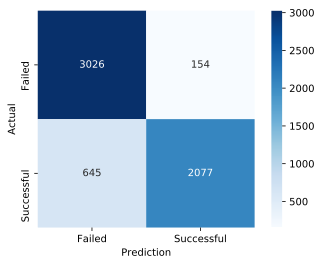

In [195]:
# purely building this on baseline pace. So feeding in column names of pace and actual outcome
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=False)
transfer_confusion = confusion_matrix(y_true, y_pred)
plt.figure(dpi=80)
sns.heatmap(transfer_confusion, cmap='Blues', annot=True, square=True, fmt='d',
    xticklabels=['Failed', 'Successful'],
    yticklabels=['Failed', 'Successful']);
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [199]:
Accuracy = round((2077+3026) / (2077+3026+154+645), 3)
Precision = round((2077) / (2077+154), 3) 
Recall = round((2077) / (2077+645), 3)

print(f'Baseline Accuracy: {Accuracy}')
print(f'Baseline Precision: {Precision}')
print(f'Baseline Recall: {Recall}')

Baseline Accuracy: 0.865
Baseline Precision: 0.931
Baseline Recall: 0.763


OK, now back to features. The next step is to select features I need, onehot / dummy encode (2 ways), then create versions with and without LSA:

In [200]:
df_games_X.head()

,final_state_x,category_name_x,converted_pledged_amount,country,converted_goal,staff_pick,time_to_launch,day_limit,days_left,days_in_field,remaining_money_needed,money_needed_by_day,money_gained_per_day,current_by_remaining_rate,day_of_week_launched,year_launched,month_launched,blurb_char_count,name_char_count,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,on_pace,is_successful
0,successful,Playing Cards,5125.0,CA,6041,False,27,20,15,6,916.0,61.066667,854.166667,13.987445,Friday,2019,February,112,48,0.118766,0.182500,-0.037265,0.037267,-0.044946,0.049501,0.002541,-0.006770,-0.007811,0.018801,-0.015498,-0.002218,0.032596,0.022209,0.004208,0.004203,0.001338,-0.001968,-0.000088,0.024586,1,1
1,successful,Tabletop Games,6587.0,US,10000,False,12,30,17,13,3413.0,200.764706,506.692308,2.523812,Friday,2019,January,97,51,0.052765,-0.033610,-0.045497,-0.031714,-0.018083,0.013460,0.014778,0.004725,-0.024136,-0.026924,0.023276,0.008448,0.065364,-0.000383,-0.012131,-0.051124,0.034466,0.001643,0.001262,0.041218,1,1
2,successful,Playing Cards,4856.0,US,10000,False,23,60,11,49,5144.0,467.636364,99.102041,0.211921,Thursday,2018,November,78,44,0.017984,0.001349,-0.002976,0.031297,0.003618,-0.023423,0.010418,0.001093,0.014256,-0.019537,0.005158,-0.012001,-0.007438,-0.001096,-0.019998,-0.001146,-0.009617,-0.009471,-0.014659,-0.006911,0,1
3,successful,Tabletop Games,7420.0,GB,8385,False,55,20,19,1,965.0,50.789474,7420.000000,146.093264,Wednesday,2019,January,130,59,0.035802,-0.011548,-0.009990,0.004433,-0.010727,0.008696,0.012592,0.040098,-0.017851,-0.027460,-0.014112,0.024724,0.065946,-0.011778,-0.024843,-0.049866,-0.035768,-0.015192,-0.001631,-0.006819,1,1
4,failed,Live Games,91.0,US,50000,False,13,60,25,35,49909.0,1996.360000,2.600000,0.001302,Thursday,2018,December,133,42,0.085047,-0.055670,-0.040441,0.037124,0.009305,0.002576,-0.034718,0.003229,-0.022656,0.009985,-0.016675,-0.076651,-0.018325,0.023050,0.023408,-0.012605,0.046087,-0.004715,-0.014554,-0.056953,0,0


In [201]:
df_games_X.columns

Index(['final_state_x', 'category_name_x', 'converted_pledged_amount',
       'country', 'converted_goal', 'staff_pick', 'time_to_launch',
       'day_limit', 'days_left', 'days_in_field', 'remaining_money_needed',
       'money_needed_by_day', 'money_gained_per_day',
       'current_by_remaining_rate', 'day_of_week_launched', 'year_launched',
       'month_launched', 'blurb_char_count', 'name_char_count', 'topic_0',
       'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6',
       'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12',
       'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18',
       'topic_19', 'on_pace', 'is_successful'],
      dtype='object')

In [216]:
df_games_X['staff_pick_num'] = df_games_X['staff_pick'].astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [223]:
df_games_X['year_launched_str'] = df_games_X['year_launched'].apply(str)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [225]:
df_games_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902 entries, 0 to 5901
Data columns (total 43 columns):
final_state_x                5902 non-null object
category_name_x              5902 non-null object
converted_pledged_amount     5902 non-null float64
country                      5902 non-null object
converted_goal               5902 non-null int64
staff_pick                   5902 non-null bool
time_to_launch               5902 non-null int64
day_limit                    5902 non-null int64
days_left                    5902 non-null int64
days_in_field                5902 non-null int64
remaining_money_needed       5902 non-null float64
money_needed_by_day          5902 non-null float64
money_gained_per_day         5902 non-null float64
current_by_remaining_rate    5902 non-null float64
day_of_week_launched         5902 non-null object
year_launched                5902 non-null int64
month_launched               5902 non-null object
blurb_char_count             5902 non-null int

Below is the key for the following df's that I will feed into models. I will creat them here, pickle them, and start a new sheet for modeling:

df_games_X_1 = All (dummy drop 1, on_pace instead of current_by_remaining_rate to avoid non-linear model)
df_games_X_2 = All (one hot no drop, current_by_remaining_rate, to use in RF)
df_games_X_3 = Non-text features (dummy drop 1, on_pace instead of current_by_remaining_rate to avoid non-linear model)
df_games_X_4 = Non-text features (one hot no drop, current_by_remaining_rate, to use in RF)
df_games_X_5 = Only text features

In [226]:
cols_X_1 = ['is_successful', 'on_pace', 'category_name_x', 'country', 'staff_pick_num', 'time_to_launch', 'day_limit', 'money_needed_by_day', 'day_of_week_launched', 'year_launched_str', 'month_launched', 'blurb_char_count', 'name_char_count', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19']
cols_X_2 = ['is_successful', 'current_by_remaining_rate', 'category_name_x', 'country', 'staff_pick_num', 'time_to_launch', 'day_limit', 'money_needed_by_day', 'day_of_week_launched', 'year_launched_str', 'month_launched', 'blurb_char_count', 'name_char_count', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19']
cols_X_3 = ['is_successful', 'on_pace', 'category_name_x', 'country', 'staff_pick_num', 'time_to_launch', 'day_limit', 'money_needed_by_day', 'day_of_week_launched', 'year_launched_str', 'month_launched', 'blurb_char_count', 'name_char_count']
cols_X_4 = ['is_successful', 'current_by_remaining_rate', 'category_name_x', 'country', 'staff_pick_num', 'time_to_launch', 'day_limit', 'money_needed_by_day', 'day_of_week_launched', 'year_launched_str', 'month_launched', 'blurb_char_count', 'name_char_count']
cols_X_5 = ['is_successful', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19']


In [227]:
df_games_X_1 = pd.get_dummies(df_games_X[cols_X_1], drop_first=True)
df_games_X_2 = pd.get_dummies(df_games_X[cols_X_2], drop_first=False)
df_games_X_3 = pd.get_dummies(df_games_X[cols_X_3], drop_first=True)
df_games_X_4 = pd.get_dummies(df_games_X[cols_X_4], drop_first=False)
df_games_X_5 = df_games_X[cols_X_5]


In [229]:
df_games_X_1.head()

,is_successful,on_pace,staff_pick_num,time_to_launch,day_limit,money_needed_by_day,blurb_char_count,name_char_count,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,category_name_x_Gaming Hardware,category_name_x_Live Games,category_name_x_Mobile Games,category_name_x_Playing Cards,category_name_x_Puzzles,category_name_x_Tabletop Games,category_name_x_Video Games,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,day_of_week_launched_Monday,day_of_week_launched_Saturday,day_of_week_launched_Sunday,day_of_week_launched_Thursday,day_of_week_launched_Tuesday,day_of_week_launched_Wednesday,year_launched_str_2016,year_launched_str_2017,year_launched_str_2018,year_launched_str_2019,month_launched_August,month_launched_December,month_launched_February,month_launched_January,month_launched_July,month_launched_June,month_launched_March,month_launched_May,month_launched_November,month_launched_October,month_launched_September
0,1,1,0,27,20,61.066667,112,48,0.118766,0.182500,-0.037265,0.037267,-0.044946,0.049501,0.002541,-0.006770,-0.007811,0.018801,-0.015498,-0.002218,0.032596,0.022209,0.004208,0.004203,0.001338,-0.001968,-0.000088,0.024586,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,1,1,0,12,30,200.764706,97,51,0.052765,-0.033610,-0.045497,-0.031714,-0.018083,0.013460,0.014778,0.004725,-0.024136,-0.026924,0.023276,0.008448,0.065364,-0.000383,-0.012131,-0.051124,0.034466,0.001643,0.001262,0.041218,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,23,60,467.636364,78,44,0.017984,0.001349,-0.002976,0.031297,0.003618,-0.023423,0.010418,0.001093,0.014256,-0.019537,0.005158,-0.012001,-0.007438,-0.001096,-0.019998,-0.001146,-0.009617,-0.009471,-0.014659,-0.006911,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1,1,0,55,20,50.789474,130,59,0.035802,-0.011548,-0.009990,0.004433,-0.010727,0.008696,0.012592,0.040098,-0.017851,-0.027460,-0.014112,0.024724,0.065946,-0.011778,-0.024843,-0.049866,-0.035768,-0.015192,-0.001631,-0.006819,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,13,60,1996.360000,133,42,0.085047,-0.055670,-0.040441,0.037124,0.009305,0.002576,-0.034718,0.003229,-0.022656,0.009985,-0.016675,-0.076651,-0.018325,0.023050,0.023408,-0.012605,0.046087,-0.004715,-0.014554,-0.056953,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [230]:
with open('/Users/robertpagano/metis_data/project_4/model_data/final/df_games_X_1.pickle', 'wb') as to_write:
    pickle.dump(df_games_X_1, to_write)
    
with open('/Users/robertpagano/metis_data/project_4/model_data/final/df_games_X_2.pickle', 'wb') as to_write:
    pickle.dump(df_games_X_2, to_write)
    
with open('/Users/robertpagano/metis_data/project_4/model_data/final/df_games_X_3.pickle', 'wb') as to_write:
    pickle.dump(df_games_X_3, to_write)
    
with open('/Users/robertpagano/metis_data/project_4/model_data/final/df_games_X_4.pickle', 'wb') as to_write:
    pickle.dump(df_games_X_4, to_write)    
    
with open('/Users/robertpagano/metis_data/project_4/model_data/final/df_games_X_5.pickle', 'wb') as to_write:
    pickle.dump(df_games_X_5, to_write)    
